In [1]:
import ast
import numpy as np
import pandas as pd
import pandas_ta as ta
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BTC_USD_2015-10-08_2020-05-27_Gemini_Hourly.csv')
df.set_index('Date', inplace=True)

df.loc[:, 'ema12'] = df.ta.ema(12)
df.loc[:, 'ema24'] = df.ta.ema(24)
df.loc[:, 'ema48'] = df.ta.ema(48)
df.loc[:, 'vwma'] = df.ta.vwma()
df.loc[:, 'log'] = np.log(df.close)

df.drop(['currency', 'open', 'high', 'low', 'volume'], axis=1, inplace=True)
df = df[48:]
df

,close,ema12,ema24,ema48,vwma,log
Date,,,,,,
2015-10-11 00:00:00,246.30,245.733371,245.733371,245.733371,245.632542,5.506550
2015-10-11 01:00:00,246.30,245.836394,245.836394,245.836394,245.725661,5.506550
2015-10-11 02:00:00,246.30,245.920686,245.920686,245.920686,245.818708,5.506550
2015-10-11 03:00:00,246.30,245.989652,245.989652,245.989652,245.911686,5.506550
2015-10-11 04:00:00,246.30,246.046079,246.046079,246.046079,246.004593,5.506550
...,...,...,...,...,...,...
2020-05-23 19:00:00,9186.01,9179.465780,9179.465780,9179.465780,9169.374777,9.125437
2020-05-23 20:00:00,9238.75,9190.244729,9190.244729,9190.244729,9179.574617,9.131162
2020-05-23 21:00:00,9235.01,9198.383869,9198.383869,9198.383869,9184.846033,9.130757


In [3]:
# Standardise data
def standardise(df, column, mean, std):
    vals = df[col].values
    df.loc[:, column+'_normal'] = pd.Series((vals - mean) / std, index=df.index, dtype=np.float64)

cols = [x for x in df.columns]

norms = open('norms.txt', 'r').readline().replace('\n', '')
norms = ast.literal_eval(norms)
for col in cols:
    std = norms[col+'_std']
    mean = norms[col+'_mean']
    standardise(df, col, mean, std)

df.drop([x for x in df.columns.tolist() if 'normal' not in x], axis=1, inplace=True)

n = len(df)
test_df = df[int(n*0.9):]

test_df

/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is try

,close_normal,ema12_normal,ema24_normal,ema48_normal,vwma_normal,log_normal
Date,,,,,,
2019-12-07 07:00:00,0.972853,0.973179,0.973179,0.973179,0.976296,1.098002
2019-12-07 08:00:00,0.967856,0.972286,0.972286,0.972286,0.975948,1.095918
2019-12-07 09:00:00,0.965558,0.971137,0.971137,0.971137,0.974971,1.094957
2019-12-07 10:00:00,0.968018,0.970644,0.970644,0.970644,0.974592,1.095985
2019-12-07 11:00:00,0.973158,0.971176,0.971176,0.971176,0.974882,1.098129
...,...,...,...,...,...,...
2020-05-23 19:00:00,1.398871,1.397709,1.397709,1.397709,1.394375,1.258460
2020-05-23 20:00:00,1.412471,1.400489,1.400489,1.400489,1.397005,1.263093
2020-05-23 21:00:00,1.411506,1.402588,1.402588,1.402588,1.398364,1.262766


In [4]:
model = tf.keras.models.load_model('BTC_USD_122448EMAs_VWAP_LOG/model')

Diff is 13.187691329631889


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


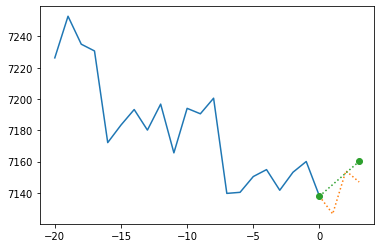

Diff is -11.325062004463689


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


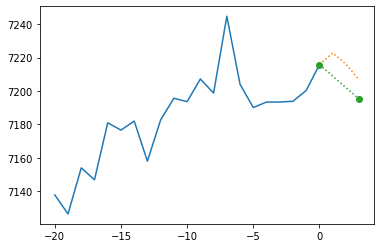

/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Diff is -16.600141606895704


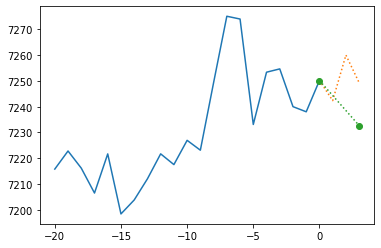

Diff is 5.081874129597054


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


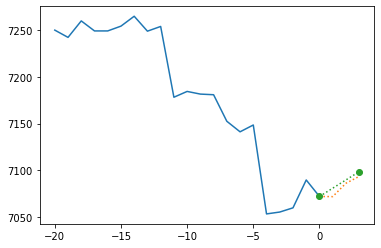

Diff is -13.63623356356402


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


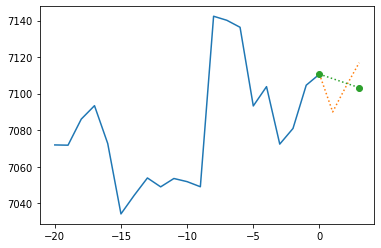

Diff is -43.12917985746208


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


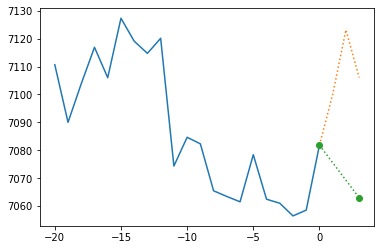

Diff is 5.068182165827238


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


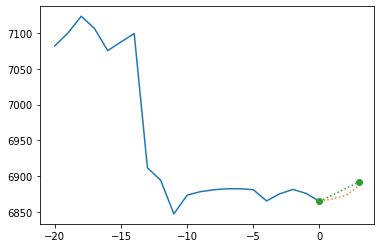

Diff is 86.5492104731511


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


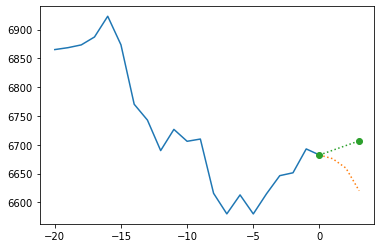

Diff is 209.15731909401802


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


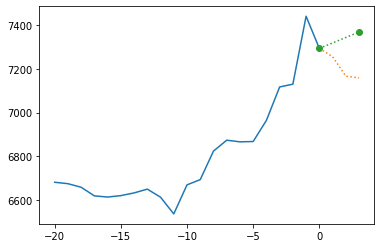

Diff is -7.057652416362544


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


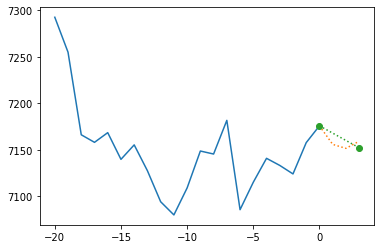

Diff is 3.6299884814216057


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


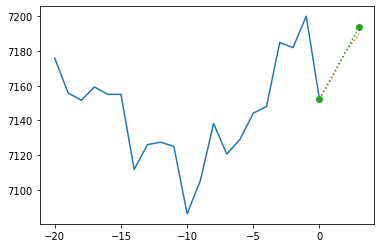

Diff is 11.510352589559261


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


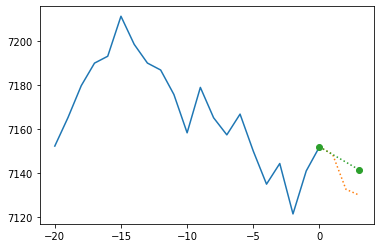

Diff is -37.14180159097759


/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


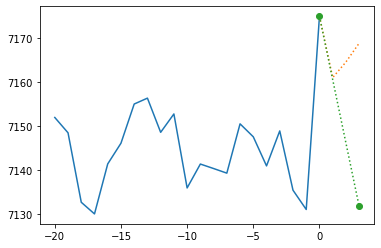

/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Diff is 57.714924262983914


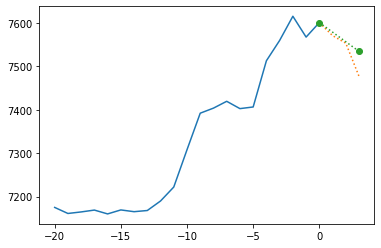

/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/harvir/Code/venvs/tensorflow_venv/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Diff is -28.40090807145043


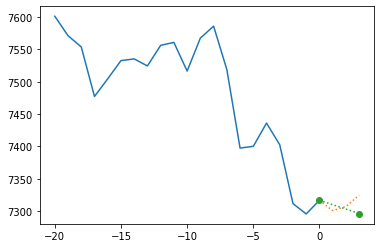

In [6]:
i = 0
INPUT_WIDTH = 20
LABEL_SHIFT = 4

for i in range(5, 20):
    new_df = test_df.iloc[(INPUT_WIDTH*i):(INPUT_WIDTH*(i+1))+LABEL_SHIFT]
    input = tf.stack([row.values for _, row in new_df.iloc[:INPUT_WIDTH].iterrows()])
    input = tf.expand_dims(input, axis=0)

    actual = (model.predict(input)[0][0] * norms['close_std']) + norms['close_mean']
    expected = (new_df.iloc[-1]['close_normal'] * norms['close_std']) + norms['close_mean']
    new_df.loc[:, 'close'] = pd.Series((new_df['close_normal'].values*norms['close_std'])+norms['close_mean'], index=new_df.index)

    if LABEL_SHIFT > 1:
        plt.plot([x for x in range(-INPUT_WIDTH, 1)], new_df['close'][:INPUT_WIDTH+1])
        plt.plot([x for x in range(0, LABEL_SHIFT)], new_df['close'][INPUT_WIDTH:], linestyle='dotted')
        plt.plot([0, LABEL_SHIFT-1], 
                     [new_df['close'][INPUT_WIDTH], actual],
                     marker='o', linestyle='dotted')
    else:
        plt.plot(new_df.index, new_df['close'])
        plt.plot(new_df.index[-1], actual, marker='o')
    print(f'Diff is {actual-expected}')
    plt.show()